# 次元とデータ数と精度の関係性 

## ランダム配置 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from numpy.random import *

In [2]:
a = np.random.randint(-300,300,(10000,))

In [3]:
b = np.random.randint(0,400,(10000,))

In [4]:
a.shape

(10000,)

(array([ 71.,  86.,  89., 120., 101., 127.,  82.,  85.,  94., 103., 109.,
        105.,  86.,  88.,  97.,  99., 102., 115.,  98., 100., 104., 106.,
         92.,  87.,  98.,  86., 101., 106.,  96.,  97.,  99., 126., 115.,
         99., 107., 121.,  97.,  98., 104., 105., 102., 107., 110., 110.,
         97.,  87., 106.,  99.,  98., 102., 121.,  96., 110., 119.,  75.,
         94., 103., 101., 100., 111.,  88.,  84.,  92., 100., 117., 103.,
        102., 106., 102.,  97., 100., 104., 104.,  95.,  87., 114., 113.,
         87.,  91., 114.,  95.,  97.,  97., 107.,  89.,  94.,  97., 107.,
         89.,  85.,  99., 103., 105., 120.,  85.,  91.,  92.,  85., 100.,
        114.]),
 array([  0.  ,   3.99,   7.98,  11.97,  15.96,  19.95,  23.94,  27.93,
         31.92,  35.91,  39.9 ,  43.89,  47.88,  51.87,  55.86,  59.85,
         63.84,  67.83,  71.82,  75.81,  79.8 ,  83.79,  87.78,  91.77,
         95.76,  99.75, 103.74, 107.73, 111.72, 115.71, 119.7 , 123.69,
        127.68, 131.67, 135.66

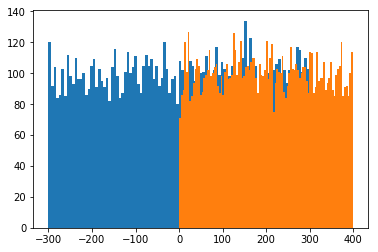

In [5]:
plt.hist(a,bins=100)
plt.hist(b,bins=100)

In [6]:
def calc_squrt(a,b):
    return (a**2+b**2)**(0.5)

In [7]:
r = calc_squrt(a,b)

In [8]:
r.shape

(10000,)

In [9]:
r

array([287.36736071,  87.20665112, 304.90982273, ..., 387.22086721,
       438.50769663, 136.02940859])

In [10]:
df = pd.DataFrame({
    "a": a,
    "b": b,
    "r":r
})

In [11]:
df.head()

,a,b,r
0,194,212,287.367361
1,-78,39,87.206651
2,123,279,304.909823
3,117,360,378.535335
4,215,10,215.232433


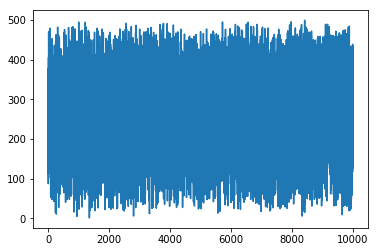

In [12]:
x = np.arange(len(df["r"]))
plt.plot(x,df["r"])

In [13]:
t1= np.where(df["r"] >= 300,0,1)
t2= np.where(df["r"] >= 300,1,0)

In [14]:
df["off"] = t1
df["on"] = t2

In [15]:
df.head()

,a,b,r,off,on
0,194,212,287.367361,1,0
1,-78,39,87.206651,1,0
2,123,279,304.909823,0,1
3,117,360,378.535335,0,1
4,215,10,215.232433,1,0


In [16]:
df1 = df[df.on==1]

df2 = df[df.on==0]

In [17]:
df1.shape,df2.shape

((4083, 5), (5917, 5))

In [18]:
t = np.array([t1,t2])

In [19]:
t.T

array([[1, 0],
       [1, 0],
       [0, 1],
       ...,
       [0, 1],
       [0, 1],
       [1, 0]])

In [20]:
df.shape

(10000, 5)

In [21]:
t.T[:7000].shape

(7000, 2)

In [22]:
t_train = t.T[:7000]

In [23]:
t_train

array([[1, 0],
       [1, 0],
       [0, 1],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]])

In [24]:
t_test = t.T[7001:,:]
print(t_test)

[[1 0]
 [0 1]
 [0 1]
 ...
 [0 1]
 [0 1]
 [1 0]]


In [25]:
t_train.shape,t_test.shape

((7000, 2), (2999, 2))

In [26]:
x = np.array([df["a"],df["b"]]).T

In [27]:
x.shape

(10000, 2)

In [28]:
(x_train, x_test) = (x[:7000],x[7001:])

In [29]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.optimizer import SGD, Adam

max_epochs = 10
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1
iter_nums = 30000

def __train(weight_init_std):
    bn_network = MultiLayerNetExtend(input_size=2, hidden_size_list=[100, 100, 100], output_size=2,
                                     weight_init_std=weight_init_std, use_batchnorm=True)
    network = MultiLayerNetExtend(input_size=2, hidden_size_list=[100, 100, 100], output_size=2,
                                weight_init_std=weight_init_std)
    optimizer = SGD(lr=learning_rate)
    
    train_acc_list = []
    bn_train_acc_list = []
    bn_test_acc_list =[]
    
    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0
    
    for i in range(iter_nums):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]
    
        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)
    
        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            bn_test_acc = bn_network.accuracy(x_test, t_test)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)
            bn_test_acc_list.append(bn_test_acc)
    
            print("epoch:" + str(epoch_cnt) + " | " + str(bn_train_acc) + " - " + str(bn_test_acc))
    
            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break
                
    return bn_train_acc_list, bn_test_acc_list

In [30]:
train_acc_list3, bn_train_acc_list3 = __train('He')

epoch:0 | 0.49142857142857144 - 0.48016005335111706


../common/functions.py:34: RuntimeWarning: overflow encountered in subtract
  x = x - np.max(x, axis=0)
../common/functions.py:34: RuntimeWarning: invalid value encountered in subtract
  x = x - np.max(x, axis=0)
../common/layers.py:12: RuntimeWarning: invalid value encountered in less_equal
  self.mask = (x <= 0)
../common/multi_layer_net_extend.py:101: RuntimeWarning: overflow encountered in square
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
/Users/Kohei/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


epoch:1 | 0.9675714285714285 - 0.9699899966655552
epoch:2 | 0.9794285714285714 - 0.9833277759253084
epoch:3 | 0.9804285714285714 - 0.9833277759253084
epoch:4 | 0.9798571428571429 - 0.9813271090363455
epoch:5 | 0.9837142857142858 - 0.9893297765921975
epoch:6 | 0.9801428571428571 - 0.9833277759253084
epoch:7 | 0.9787142857142858 - 0.9829943314438147
epoch:8 | 0.9805714285714285 - 0.9813271090363455
epoch:9 | 0.9834285714285714 - 0.9879959986662221


In [31]:
t.T[:700].shape

(700, 2)

In [32]:
t_train = t.T[:700]

In [33]:
t_train

array([[1, 0],
       [1, 0],
       [0, 1],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]])

In [34]:
t_test = t.T[701:1000,:]
print(t_test)

[[1 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]

In [35]:
t_train.shape,t_test.shape

((700, 2), (299, 2))

In [36]:
x = np.array([df["a"],df["b"]]).T

In [37]:
x.shape

(10000, 2)

In [38]:
(x_train, x_test) = (x[:700],x[701:1000])

In [39]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.optimizer import SGD, Adam

max_epochs = 10
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1
iter_nums = 30000

def __train(weight_init_std):
    bn_network = MultiLayerNetExtend(input_size=2, hidden_size_list=[100, 100, 100], output_size=2,
                                     weight_init_std=weight_init_std, use_batchnorm=True)
    network = MultiLayerNetExtend(input_size=2, hidden_size_list=[100, 100, 100], output_size=2,
                                weight_init_std=weight_init_std)
    optimizer = SGD(lr=learning_rate)
    
    train_acc_list = []
    bn_train_acc_list = []
    bn_test_acc_list =[]
    
    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0
    
    for i in range(iter_nums):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]
    
        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)
    
        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            bn_test_acc = bn_network.accuracy(x_test, t_test)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)
            bn_test_acc_list.append(bn_test_acc)
    
            print("epoch:" + str(epoch_cnt) + " | " + str(bn_train_acc) + " - " + str(bn_test_acc))
    
            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break
                
    return bn_train_acc_list, bn_test_acc_list

In [40]:
train_acc_list4, bn_train_acc_list4 = __train('He')

epoch:0 | 0.55 - 0.5484949832775919
epoch:1 | 0.6171428571428571 - 0.6220735785953178
epoch:2 | 0.7442857142857143 - 0.7357859531772575
epoch:3 | 0.84 - 0.8394648829431438
epoch:4 | 0.9228571428571428 - 0.9063545150501672


../common/multi_layer_net_extend.py:101: RuntimeWarning: overflow encountered in square
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
../common/multi_layer_net_extend.py:101: RuntimeWarning: invalid value encountered in double_scalars
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
../common/functions.py:34: RuntimeWarning: invalid value encountered in subtract
  x = x - np.max(x, axis=0)
../common/layers.py:12: RuntimeWarning: invalid value encountered in less_equal
  self.mask = (x <= 0)
/Users/Kohei/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


epoch:5 | 0.9485714285714286 - 0.9498327759197325
epoch:6 | 0.9614285714285714 - 0.959866220735786
epoch:7 | 0.9685714285714285 - 0.959866220735786
epoch:8 | 0.98 - 0.9732441471571907
epoch:9 | 0.98 - 0.9765886287625418


## 四次元 

In [41]:
a = np.random.randint(-300,300,(10000,))

In [42]:
b = np.random.randint(0,400,(10000,))

In [43]:
c = np.random.randint(600,900,(10000,))

In [44]:
d = np.random.randint(-500,200,(10000,))

In [45]:
a.shape

(10000,)

(array([ 88.,  96., 109., 106.,  89., 132.,  92.,  98., 104., 114., 111.,
         95.,  94., 103.,  95.,  88., 104.,  99., 100., 114., 109., 105.,
         86., 100., 111.,  86., 100., 111., 103., 108.,  91.,  85.,  96.,
         98.,  78.,  91.,  84.,  93.,  94., 101.,  90.,  95., 111.,  95.,
        104., 110.,  91.,  95., 116., 113.,  98.,  90.,  92., 100., 100.,
         94.,  90.,  84., 106.,  97.,  92.,  92.,  96., 107.,  95., 101.,
        103.,  94.,  95.,  83., 111.,  93.,  97., 107., 105., 104., 109.,
        117., 111., 100., 111.,  95., 103.,  96., 109., 113., 113., 101.,
        111.,  98.,  90., 103.,  85., 101.,  99.,  99., 112., 105., 110.,
        102.]),
 array([-500.  , -493.01, -486.02, -479.03, -472.04, -465.05, -458.06,
        -451.07, -444.08, -437.09, -430.1 , -423.11, -416.12, -409.13,
        -402.14, -395.15, -388.16, -381.17, -374.18, -367.19, -360.2 ,
        -353.21, -346.22, -339.23, -332.24, -325.25, -318.26, -311.27,
        -304.28, -297.29, -290.3 ,

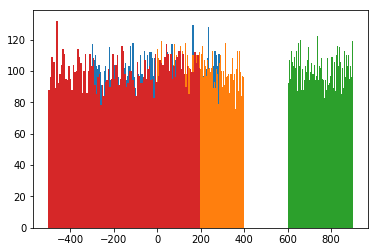

In [46]:
plt.hist(a,bins=100)
plt.hist(b,bins=100)
plt.hist(c,bins=100)
plt.hist(d,bins=100)

In [47]:
def calc_squrt(a,b):
    return (a**2+b**2+c**2+d**2)**(0.5)

In [48]:
r = calc_squrt(a,b)

In [49]:
r.shape

(10000,)

In [50]:
r

array([862.89338855, 979.80508266, 888.44470847, ..., 798.85230174,
       784.20979336, 958.8905047 ])

In [51]:
df = pd.DataFrame({
    "a": a,
    "b": b,
    "c": c,
    "d": d,
    "r":r
})

In [52]:
df.head()

,a,b,c,d,r
0,212,9,754,-362,862.893389
1,-20,309,821,-436,979.805083
2,-286,185,808,143,888.444708
3,-125,170,740,-109,777.178229
4,-207,158,674,1,722.557956


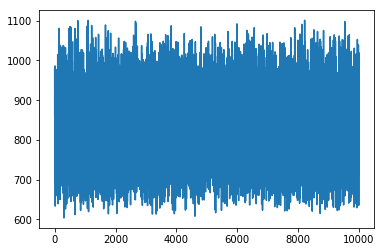

In [53]:
x = np.arange(len(df["r"]))
plt.plot(x,df["r"])

In [54]:
t1= np.where(df["r"] >= 900,0,1)
t2= np.where(df["r"] >= 900,1,0)

In [55]:
df["off"] = t1
df["on"] = t2

In [56]:
df.head()

,a,b,c,d,r,off,on
0,212,9,754,-362,862.893389,1,0
1,-20,309,821,-436,979.805083,0,1
2,-286,185,808,143,888.444708,1,0
3,-125,170,740,-109,777.178229,1,0
4,-207,158,674,1,722.557956,1,0


In [57]:
df1 = df[df.on==1]

df2 = df[df.on==0]

In [58]:
df1.shape,df2.shape

((2821, 7), (7179, 7))

In [59]:
t = np.array([t1,t2])

In [60]:
t.T

array([[1, 0],
       [0, 1],
       [1, 0],
       ...,
       [1, 0],
       [1, 0],
       [0, 1]])

In [61]:
df.shape

(10000, 7)

In [62]:
t.T[:7000].shape

(7000, 2)

In [63]:
t_train = t.T[:7000]

In [64]:
t_train

array([[1, 0],
       [0, 1],
       [1, 0],
       ...,
       [1, 0],
       [0, 1],
       [0, 1]])

In [65]:
t_test = t.T[7001:,:]
print(t_test)

[[1 0]
 [1 0]
 [0 1]
 ...
 [1 0]
 [1 0]
 [0 1]]


In [66]:
t_train.shape,t_test.shape

((7000, 2), (2999, 2))

In [67]:
x = np.array([df["a"],df["b"],df["c"],df["d"]]).T

In [68]:
x.shape

(10000, 4)

In [69]:
(x_train, x_test) = (x[:7000],x[7001:])

In [70]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.optimizer import SGD, Adam

max_epochs = 10
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1
iter_nums = 30000

def __train(weight_init_std):
    bn_network = MultiLayerNetExtend(input_size=4, hidden_size_list=[100, 100, 100], output_size=2,
                                     weight_init_std=weight_init_std, use_batchnorm=True)
    network = MultiLayerNetExtend(input_size=4, hidden_size_list=[100, 100, 100], output_size=2,
                                weight_init_std=weight_init_std)
    optimizer = SGD(lr=learning_rate)
    
    train_acc_list = []
    bn_train_acc_list = []
    bn_test_acc_list =[]
    
    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0
    
    for i in range(iter_nums):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]
    
        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)
    
        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            bn_test_acc = bn_network.accuracy(x_test, t_test)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)
            bn_test_acc_list.append(bn_test_acc)
    
            print("epoch:" + str(epoch_cnt) + " | " + str(bn_train_acc) + " - " + str(bn_test_acc))
    
            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break
                
    return bn_train_acc_list, bn_test_acc_list

In [71]:
train_acc_list41, bn_train_acc_list41 = __train('He')

epoch:0 | 0.28414285714285714 - 0.294431477159053
epoch:1 | 0.9595714285714285 - 0.9539846615538513
epoch:2 | 0.9751428571428571 - 0.9699899966655552
epoch:3 | 0.9807142857142858 - 0.9749916638879627
epoch:4 | 0.9792857142857143 - 0.9733244414804935
epoch:5 | 0.9841428571428571 - 0.9779926642214072
epoch:6 | 0.9804285714285714 - 0.9706568856285428
epoch:7 | 0.9845714285714285 - 0.9779926642214072
epoch:8 | 0.9847142857142858 - 0.9773257752584195
epoch:9 | 0.9821428571428571 - 0.9783261087029009


In [72]:
t.T[:700].shape

(700, 2)

In [73]:
t_train = t.T[:700]

In [74]:
t_train

array([[1, 0],
       [0, 1],
       [1, 0],
       ...,
       [1, 0],
       [1, 0],
       [0, 1]])

In [75]:
t_test = t.T[701:1000,:]
print(t_test)

[[1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [1 0]

In [76]:
t_train.shape,t_test.shape

((700, 2), (299, 2))

In [77]:
x = np.array([df["a"],df["b"],df["c"],df["d"]]).T

In [78]:
x.shape

(10000, 4)

In [79]:
(x_train, x_test) = (x[:700],x[701:1000])

In [80]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.optimizer import SGD, Adam

max_epochs = 10
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1
iter_nums = 30000

def __train(weight_init_std):
    bn_network = MultiLayerNetExtend(input_size=4, hidden_size_list=[100, 100, 100], output_size=2,
                                     weight_init_std=weight_init_std, use_batchnorm=True)
    network = MultiLayerNetExtend(input_size=4, hidden_size_list=[100, 100, 100], output_size=2,
                                weight_init_std=weight_init_std)
    optimizer = SGD(lr=learning_rate)
    
    train_acc_list = []
    bn_train_acc_list = []
    bn_test_acc_list =[]
    
    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0
    
    for i in range(iter_nums):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]
    
        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)
    
        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            bn_test_acc = bn_network.accuracy(x_test, t_test)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)
            bn_test_acc_list.append(bn_test_acc)
    
            print("epoch:" + str(epoch_cnt) + " | " + str(bn_train_acc) + " - " + str(bn_test_acc))
    
            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break
                
    return bn_train_acc_list, bn_test_acc_list

In [81]:
train_acc_list42, bn_train_acc_list42 = __train('He')

epoch:0 | 0.24428571428571427 - 0.2976588628762542
epoch:1 | 0.24428571428571427 - 0.2976588628762542
epoch:2 | 0.31857142857142856 - 0.3779264214046823
epoch:3 | 0.6028571428571429 - 0.6086956521739131
epoch:4 | 0.8357142857142857 - 0.7993311036789298
epoch:5 | 0.8914285714285715 - 0.8494983277591973
epoch:6 | 0.9557142857142857 - 0.9130434782608695
epoch:7 | 0.9585714285714285 - 0.9230769230769231
epoch:8 | 0.9657142857142857 - 0.9464882943143813
epoch:9 | 0.9814285714285714 - 0.9632107023411371


### ６次元 

In [82]:
a = np.random.randint(-300,300,(10000,))

In [83]:
b = np.random.randint(0,400,(10000,))

In [84]:
c = np.random.randint(600,900,(10000,))

In [85]:
d = np.random.randint(-500,200,(10000,))

In [86]:
e = np.random.randint(10,50,(10000,))

In [87]:
f = np.random.randint(1500,1700,(10000,))

In [88]:
a.shape

(10000,)

(array([ 91., 103.,  99.,  97.,  94.,  95., 102.,  87., 102.,  87., 106.,
        111.,  89.,  99.,  96.,  92., 105.,  85.,  94.,  79., 106., 106.,
         95.,  95., 105.,  87.,  93., 115.,  87.,  84., 104.,  94., 103.,
        113.,  84.,  96.,  89.,  99., 118., 102., 110.,  93., 100., 104.,
         95., 108., 101., 113.,  97.,  98., 106.,  98.,  90., 101.,  88.,
         92., 104.,  95.,  91., 124.,  99., 100., 107.,  97., 116.,  96.,
        112., 102., 111.,  87., 108., 120.,  94.,  91., 128., 101., 130.,
         92., 113.,  97.,  94.,  98., 101.,  86.,  90., 103., 108., 113.,
        117.,  96.,  88., 102.,  89.,  98., 107., 102.,  97., 101., 107.,
        106.]),
 array([1500.  , 1501.99, 1503.98, 1505.97, 1507.96, 1509.95, 1511.94,
        1513.93, 1515.92, 1517.91, 1519.9 , 1521.89, 1523.88, 1525.87,
        1527.86, 1529.85, 1531.84, 1533.83, 1535.82, 1537.81, 1539.8 ,
        1541.79, 1543.78, 1545.77, 1547.76, 1549.75, 1551.74, 1553.73,
        1555.72, 1557.71, 1559.7 ,

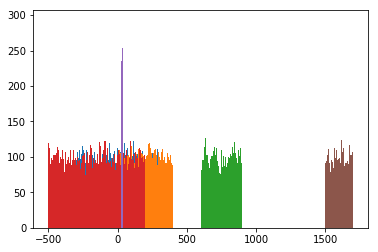

In [89]:
plt.hist(a,bins=100)
plt.hist(b,bins=100)
plt.hist(c,bins=100)
plt.hist(d,bins=100)
plt.hist(e,bins=100)
plt.hist(f,bins=100)

In [90]:
def calc_squrt(a,b):
    return (a**2+b**2+c**2+d**2+e**2+f**2)**(0.5)

In [91]:
r = calc_squrt(a,b)

In [92]:
r.shape

(10000,)

In [93]:
r

array([1811.01684145, 1897.4227257 , 1812.76997989, ..., 1926.89024078,
       1959.50070171, 1805.39386285])

In [94]:
df = pd.DataFrame({
    "a": a,
    "b": b,
    "c": c,
    "d": d,
    "e": e,
    "f": f,
    "r":r
})

In [95]:
df.head()

,a,b,c,d,e,f,r
0,1,171,643,-419,37,1631,1811.016841
1,92,326,850,-44,46,1661,1897.422726
2,-81,40,893,-277,36,1550,1812.769980
3,253,23,675,-55,22,1591,1747.842384
4,43,350,639,188,24,1645,1809.589733


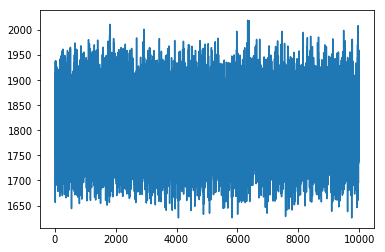

In [96]:
x = np.arange(len(df["r"]))
plt.plot(x,df["r"])

In [97]:
t1= np.where(df["r"] >= 1850,0,1)
t2= np.where(df["r"] >= 1850,1,0)

In [98]:
df["off"] = t1
df["on"] = t2

In [99]:
df.head()

,a,b,c,d,e,f,r,off,on
0,1,171,643,-419,37,1631,1811.016841,1,0
1,92,326,850,-44,46,1661,1897.422726,0,1
2,-81,40,893,-277,36,1550,1812.769980,1,0
3,253,23,675,-55,22,1591,1747.842384,1,0
4,43,350,639,188,24,1645,1809.589733,1,0


In [100]:
df1 = df[df.on==1]

df2 = df[df.on==0]

In [101]:
df1.shape,df2.shape

((2931, 9), (7069, 9))

In [102]:
t = np.array([t1,t2])

In [103]:
t.T

array([[1, 0],
       [0, 1],
       [1, 0],
       ...,
       [0, 1],
       [0, 1],
       [1, 0]])

In [104]:
df.shape

(10000, 9)

In [105]:
t.T[:7000].shape

(7000, 2)

In [106]:
t_train = t.T[:7000]

In [107]:
t_train

array([[1, 0],
       [0, 1],
       [1, 0],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]])

In [108]:
t_test = t.T[7001:,:]
print(t_test)

[[1 0]
 [1 0]
 [1 0]
 ...
 [0 1]
 [0 1]
 [1 0]]


In [109]:
t_train.shape,t_test.shape

((7000, 2), (2999, 2))

In [110]:
x = np.array([df["a"],df["b"],df["c"],df["d"],df["e"],df["f"]]).T

In [111]:
x.shape

(10000, 6)

In [112]:
(x_train, x_test) = (x[:7000],x[7001:])

In [113]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.optimizer import SGD, Adam

max_epochs = 10
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1
iter_nums = 30000

def __train(weight_init_std):
    bn_network = MultiLayerNetExtend(input_size=6, hidden_size_list=[100, 100, 100], output_size=2,
                                     weight_init_std=weight_init_std, use_batchnorm=True)
    network = MultiLayerNetExtend(input_size=6, hidden_size_list=[100, 100, 100], output_size=2,
                                weight_init_std=weight_init_std)
    optimizer = SGD(lr=learning_rate)
    
    train_acc_list = []
    bn_train_acc_list = []
    bn_test_acc_list =[]
    
    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0
    
    for i in range(iter_nums):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]
    
        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)
    
        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            bn_test_acc = bn_network.accuracy(x_test, t_test)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)
            bn_test_acc_list.append(bn_test_acc)
    
            print("epoch:" + str(epoch_cnt) + " | " + str(bn_train_acc) + " - " + str(bn_test_acc))
    
            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break
                
    return bn_train_acc_list, bn_test_acc_list

In [114]:
train_acc_list61, bn_train_acc_list61 = __train('He')

epoch:0 | 0.2897142857142857 - 0.30110036678892965
epoch:1 | 0.9412857142857143 - 0.9423141047015672
epoch:2 | 0.9614285714285714 - 0.9569856618872957
epoch:3 | 0.9698571428571429 - 0.9693231077025676
epoch:4 | 0.9707142857142858 - 0.9639879959986662
epoch:5 | 0.9851428571428571 - 0.9819939979993331
epoch:6 | 0.9804285714285714 - 0.974324774924975
epoch:7 | 0.9837142857142858 - 0.9773257752584195
epoch:8 | 0.9877142857142858 - 0.980326775591864
epoch:9 | 0.9864285714285714 - 0.9776592197399133


In [115]:
t.T[:700].shape

(700, 2)

In [116]:
t_train = t.T[:700]

In [117]:
t_train

array([[1, 0],
       [0, 1],
       [1, 0],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]])

In [118]:
t_test = t.T[701:1000,:]
print(t_test)

[[1 0]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]

In [119]:
t_train.shape,t_test.shape

((700, 2), (299, 2))

In [120]:
x = np.array([df["a"],df["b"],df["c"],df["d"],df["e"],df["f"]]).T

In [121]:
x.shape

(10000, 6)

In [122]:
(x_train, x_test) = (x[:700],x[701:1000])

In [123]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.optimizer import SGD, Adam

max_epochs = 10
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1
iter_nums = 30000

def __train(weight_init_std):
    bn_network = MultiLayerNetExtend(input_size=6, hidden_size_list=[100, 100, 100], output_size=2,
                                     weight_init_std=weight_init_std, use_batchnorm=True)
    network = MultiLayerNetExtend(input_size=6, hidden_size_list=[100, 100, 100], output_size=2,
                                weight_init_std=weight_init_std)
    optimizer = SGD(lr=learning_rate)
    
    train_acc_list = []
    bn_train_acc_list = []
    bn_test_acc_list =[]
    
    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0
    
    for i in range(iter_nums):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]
    
        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)
    
        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            bn_test_acc = bn_network.accuracy(x_test, t_test)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)
            bn_test_acc_list.append(bn_test_acc)
    
            print("epoch:" + str(epoch_cnt) + " | " + str(bn_train_acc) + " - " + str(bn_test_acc))
    
            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break
                
    return bn_train_acc_list, bn_test_acc_list

In [124]:
train_acc_list62, bn_train_acc_list62 = __train('He')

epoch:0 | 0.2885714285714286 - 0.27759197324414714
epoch:1 | 0.2885714285714286 - 0.27759197324414714
epoch:2 | 0.2885714285714286 - 0.27759197324414714
epoch:3 | 0.29285714285714287 - 0.28762541806020064
epoch:4 | 0.47285714285714286 - 0.451505016722408
epoch:5 | 0.7342857142857143 - 0.7324414715719063
epoch:6 | 0.8657142857142858 - 0.8595317725752508
epoch:7 | 0.9185714285714286 - 0.9063545150501672
epoch:8 | 0.9542857142857143 - 0.9331103678929766
epoch:9 | 0.9742857142857143 - 0.9431438127090301


Text(0.5,1,'Relationship between Dimension, Data number and accuracy')

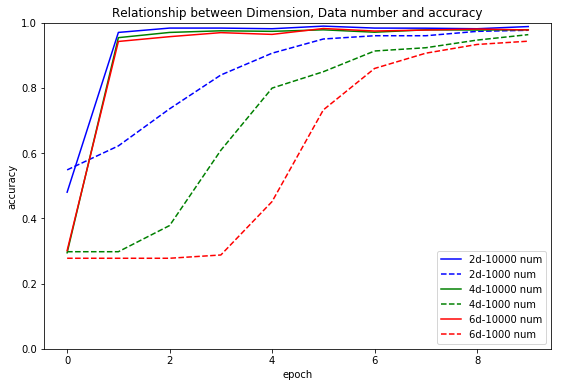

In [126]:
# グラフの描画
plt.figure(figsize=(20,6)) # figureの縦横の大きさ
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(bn_train_acc_list3))
plt.subplot(1,2,1)
plt.plot(x, bn_train_acc_list3, label='2d-10000 num', markevery=2, color = "blue")
plt.plot(x, bn_train_acc_list4, label='2d-1000 num', markevery=2, color = "blue",linestyle = "dashed")
plt.plot(x, bn_train_acc_list41, label='4d-10000 num', markevery=2, color = "green")
plt.plot(x, bn_train_acc_list42, label='4d-1000 num', markevery=2, color = "green",linestyle = "dashed")
plt.plot(x, bn_train_acc_list61, label='6d-10000 num', markevery=2, color = "red")
plt.plot(x, bn_train_acc_list62, label='6d-1000 num', markevery=2, color = "red",linestyle = "dashed")

plt.xlabel('epoch')
plt.xlabel('epoch')
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.title('Relationship between Dimension, Data number and accuracy')

### 考察
* データ数が多いと次元数を増やしても精度に影響しない
* データ数が少ないと次元を大きくするほうが精度が落ちている

## ガウス分布で検証

In [179]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from numpy.random import *

In [180]:
a = np.random.normal(
    loc = -10,
    scale = 100,
    size = 10000)

In [181]:
b = np.random.normal(
    loc = 200,
    scale = 50,
    size = 10000)

In [182]:
a.shape

(10000,)

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.,   1.,   4.,   1.,   0.,   3.,   1.,   5.,   3.,   8.,  13.,
          7.,  19.,  11.,  22.,  29.,  25.,  24.,  28.,  60.,  47.,  44.,
         66.,  86.,  97., 104., 116., 130., 166., 148., 162., 191., 193.,
        225., 231., 272., 288., 293., 307., 310., 315., 326., 301., 325.,
        311., 329., 325., 314., 320., 296., 279., 288., 245., 250., 216.,
        196., 201., 183., 156., 137., 115., 119.,  90.,  93.,  74.,  80.,
         60.,  51.,  47.,  33.,  40.,  26.,  21.,  23.,  15.,  15.,   9.,
          9.,   8.,   4.,   4.,   3.,   3.,   1.,   0.,   0.,   0.,   0.,
          2.]), array([-25.2563895 , -21.16962093, -17.08285236, -12.99608378,
         -8.90931521,  -4.82254663,  -0.73577806,   3.35099051,
          7.43775909,  11.52452766,  15.61129623,  19.69806481,
         23.78483338,  27.87160195,  31.95837053,  36.0451391 ,
         40.13190768,  44.21867625,  48.30544482,  52.3922134 ,

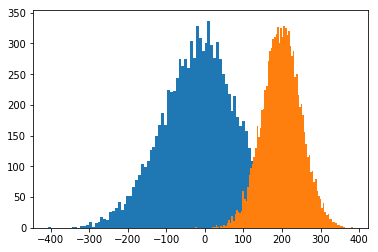

In [183]:
plt.hist(a,bins=100)
plt.hist(b,bins=100)

In [184]:
def calc_squrt(a,b):
    return (a**2+b**2)**(0.5)

In [185]:
r = calc_squrt(a,b)

In [186]:
r.shape

(10000,)

In [187]:
r

array([179.80222549, 324.36110648, 275.790528  , ..., 221.62727254,
       300.71985894, 231.35203017])

In [188]:
df = pd.DataFrame({
    "a": a,
    "b": b,
    "r":r
})

In [189]:
df.head()

,a,b,r
0,60.871907,169.184666,179.802225
1,7.728917,324.269011,324.361106
2,103.040176,255.818564,275.790528
3,29.132587,212.657066,214.643275
4,-62.913295,99.024838,117.320080


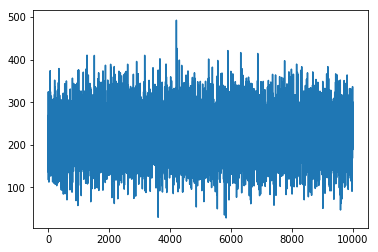

In [190]:
x = np.arange(len(df["r"]))
plt.plot(x,df["r"])

In [191]:
t1= np.where(df["r"] >= 300,0,1)
t2= np.where(df["r"] >= 300,1,0)

In [192]:
df["off"] = t1
df["on"] = t2

In [193]:
df.head()

,a,b,r,off,on
0,60.871907,169.184666,179.802225,1,0
1,7.728917,324.269011,324.361106,0,1
2,103.040176,255.818564,275.790528,1,0
3,29.132587,212.657066,214.643275,1,0
4,-62.913295,99.024838,117.320080,1,0


In [194]:
df1 = df[df.on==1]

df2 = df[df.on==0]

In [195]:
df1.shape,df2.shape

((801, 5), (9199, 5))

In [196]:
t = np.array([t1,t2])

In [197]:
t.T

array([[1, 0],
       [0, 1],
       [1, 0],
       ...,
       [1, 0],
       [0, 1],
       [1, 0]])

In [198]:
df.shape

(10000, 5)

In [199]:
t.T[:7000].shape

(7000, 2)

In [200]:
t_train = t.T[:7000]

In [201]:
t_train

array([[1, 0],
       [0, 1],
       [1, 0],
       ...,
       [0, 1],
       [1, 0],
       [0, 1]])

In [202]:
t_test = t.T[7001:,:]
print(t_test)

[[1 0]
 [1 0]
 [1 0]
 ...
 [1 0]
 [0 1]
 [1 0]]


In [203]:
t_train.shape,t_test.shape

((7000, 2), (2999, 2))

In [204]:
x = np.array([df["a"],df["b"]]).T

In [205]:
x.shape

(10000, 2)

In [206]:
(x_train, x_test) = (x[:7000],x[7001:])

In [207]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.optimizer import SGD, Adam

max_epochs = 10
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1
iter_nums = 30000

def __train(weight_init_std):
    bn_network = MultiLayerNetExtend(input_size=2, hidden_size_list=[100, 100, 100], output_size=2,
                                     weight_init_std=weight_init_std, use_batchnorm=True)
    network = MultiLayerNetExtend(input_size=2, hidden_size_list=[100, 100, 100], output_size=2,
                                weight_init_std=weight_init_std)
    optimizer = SGD(lr=learning_rate)
    
    train_acc_list = []
    bn_train_acc_list = []
    bn_test_acc_list =[]
    
    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0
    
    for i in range(iter_nums):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]
    
        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)
    
        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            bn_test_acc = bn_network.accuracy(x_test, t_test)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)
            bn_test_acc_list.append(bn_test_acc)
    
            print("epoch:" + str(epoch_cnt) + " | " + str(bn_train_acc) + " - " + str(bn_test_acc))
    
            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break
                
    return bn_train_acc_list, bn_test_acc_list

In [208]:
train_acc_list3, bn_train_acc_list3 = __train('He')

epoch:0 | 0.916 - 0.918972990996999


../common/functions.py:34: RuntimeWarning: invalid value encountered in subtract
  x = x - np.max(x, axis=0)
../common/layers.py:12: RuntimeWarning: invalid value encountered in less_equal
  self.mask = (x <= 0)
/Users/Kohei/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


epoch:1 | 0.97 - 0.9636545515171724
epoch:2 | 0.992 - 0.9889963321107036
epoch:3 | 0.9725714285714285 - 0.9719906635545181
epoch:4 | 0.9844285714285714 - 0.9813271090363455
epoch:5 | 0.9872857142857143 - 0.9853284428142715
epoch:6 | 0.9892857142857143 - 0.9889963321107036
epoch:7 | 0.9742857142857143 - 0.9719906635545181
epoch:8 | 0.9832857142857143 - 0.98432810936979
epoch:9 | 0.9954285714285714 - 0.9939979993331111


In [209]:
t.T[:700].shape

(700, 2)

In [210]:
t_train = t.T[:700]

In [211]:
t_train

array([[1, 0],
       [0, 1],
       [1, 0],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]])

In [212]:
t_test = t.T[701:1000,:]
print(t_test)

[[1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]

In [213]:
t_train.shape,t_test.shape

((700, 2), (299, 2))

In [214]:
x = np.array([df["a"],df["b"]]).T

In [215]:
x.shape

(10000, 2)

In [216]:
(x_train, x_test) = (x[:700],x[701:1000])

In [217]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.optimizer import SGD, Adam

max_epochs = 10
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1
iter_nums = 30000

def __train(weight_init_std):
    bn_network = MultiLayerNetExtend(input_size=2, hidden_size_list=[100, 100, 100], output_size=2,
                                     weight_init_std=weight_init_std, use_batchnorm=True)
    network = MultiLayerNetExtend(input_size=2, hidden_size_list=[100, 100, 100], output_size=2,
                                weight_init_std=weight_init_std)
    optimizer = SGD(lr=learning_rate)
    
    train_acc_list = []
    bn_train_acc_list = []
    bn_test_acc_list =[]
    
    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0
    
    for i in range(iter_nums):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]
    
        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)
    
        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            bn_test_acc = bn_network.accuracy(x_test, t_test)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)
            bn_test_acc_list.append(bn_test_acc)
    
            print("epoch:" + str(epoch_cnt) + " | " + str(bn_train_acc) + " - " + str(bn_test_acc))
    
            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break
                
    return bn_train_acc_list, bn_test_acc_list

In [218]:
train_acc_list4, bn_train_acc_list4 = __train('He')

epoch:0 | 0.9385714285714286 - 0.9264214046822743
epoch:1 | 0.2 - 0.2140468227424749
epoch:2 | 0.62 - 0.5919732441471572
epoch:3 | 0.9028571428571428 - 0.8561872909698997
epoch:4 | 0.9571428571428572 - 0.939799331103679


../common/multi_layer_net_extend.py:101: RuntimeWarning: overflow encountered in square
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
../common/multi_layer_net_extend.py:101: RuntimeWarning: invalid value encountered in double_scalars
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
../common/functions.py:34: RuntimeWarning: invalid value encountered in subtract
  x = x - np.max(x, axis=0)
../common/layers.py:12: RuntimeWarning: invalid value encountered in less_equal
  self.mask = (x <= 0)
/Users/Kohei/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


epoch:5 | 0.9571428571428572 - 0.9264214046822743
epoch:6 | 0.9857142857142858 - 0.9732441471571907
epoch:7 | 0.9728571428571429 - 0.9698996655518395
epoch:8 | 0.9557142857142857 - 0.9230769230769231
epoch:9 | 0.9628571428571429 - 0.9565217391304348


## 四次元 

In [220]:
a = np.random.normal(
    loc = -10,
    scale = 100,
    size = 10000)

In [221]:
b = np.random.normal(
    loc = 200,
    scale = 50,
    size = 10000)

In [222]:
c = np.random.normal(
    loc = -600,
    scale = 40,
    size = 10000)

In [223]:
d = np.random.normal(
    loc = 400,
    scale = 10,
    size = 10000)

In [224]:
a.shape

(10000,)

(array([  1.,   0.,   0.,   1.,   0.,   1.,   1.,   2.,   0.,   3.,   1.,
          6.,   7.,   3.,   2.,   4.,  15.,   6.,  13.,  15.,  17.,  10.,
         29.,  38.,  35.,  52.,  52.,  64.,  64.,  67.,  94., 116., 116.,
        151., 163., 162., 171., 203., 162., 226., 229., 228., 255., 266.,
        272., 273., 279., 298., 313., 291., 311., 289., 286., 317., 322.,
        278., 290., 263., 253., 284., 255., 216., 221., 211., 140., 163.,
        114., 131., 112.,  99.,  97.,  74.,  83.,  76.,  47.,  46.,  40.,
         35.,  29.,  15.,  22.,  21.,  17.,  14.,  10.,   8.,   7.,   4.,
          6.,   2.,   4.,   1.,   1.,   3.,   1.,   2.,   0.,   1.,   1.,
          1.]), array([360.46989587, 361.24838476, 362.02687366, 362.80536255,
        363.58385145, 364.36234034, 365.14082924, 365.91931813,
        366.69780702, 367.47629592, 368.25478481, 369.03327371,
        369.8117626 , 370.59025149, 371.36874039, 372.14722928,
        372.92571818, 373.70420707, 374.48269596, 375.26118486,

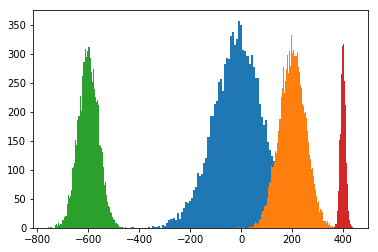

In [225]:
plt.hist(a,bins=100)
plt.hist(b,bins=100)
plt.hist(c,bins=100)
plt.hist(d,bins=100)

In [226]:
def calc_squrt(a,b):
    return (a**2+b**2+c**2+d**2)**(0.5)

In [227]:
r = calc_squrt(a,b)

In [228]:
r.shape

(10000,)

In [229]:
r

array([745.86945612, 730.54674089, 770.13327843, ..., 744.52175982,
       753.6144998 , 726.70045236])

In [230]:
df = pd.DataFrame({
    "a": a,
    "b": b,
    "c": c,
    "d": d,
    "r":r
})

In [231]:
df.head()

,a,b,c,d,r
0,45.962223,180.058856,-588.023819,419.542032,745.869456
1,-48.938196,239.714128,-566.524546,391.012365,730.546741
2,-76.074448,202.193711,-622.248358,399.052164,770.133278
3,-33.475973,295.349655,-545.578156,401.724637,739.858276
4,-82.437309,78.125408,-563.422909,396.476839,698.239749


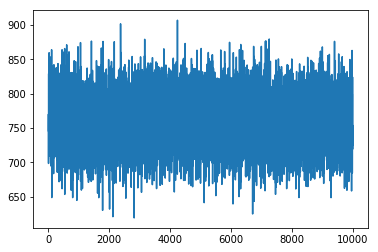

In [232]:
x = np.arange(len(df["r"]))
plt.plot(x,df["r"])

In [239]:
t1= np.where(df["r"] >= 800,0,1)
t2= np.where(df["r"] >= 800,1,0)

In [240]:
df["off"] = t1
df["on"] = t2

In [241]:
df.head()

,a,b,c,d,r,off,on
0,45.962223,180.058856,-588.023819,419.542032,745.869456,1,0
1,-48.938196,239.714128,-566.524546,391.012365,730.546741,1,0
2,-76.074448,202.193711,-622.248358,399.052164,770.133278,1,0
3,-33.475973,295.349655,-545.578156,401.724637,739.858276,1,0
4,-82.437309,78.125408,-563.422909,396.476839,698.239749,1,0


In [242]:
df1 = df[df.on==1]

df2 = df[df.on==0]

In [243]:
df1.shape,df2.shape

((1179, 7), (8821, 7))

In [244]:
t = np.array([t1,t2])

In [245]:
t.T

array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]])

In [246]:
df.shape

(10000, 7)

In [247]:
t.T[:7000].shape

(7000, 2)

In [248]:
t_train = t.T[:7000]

In [249]:
t_train

array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]])

In [250]:
t_test = t.T[7001:,:]
print(t_test)

[[0 1]
 [1 0]
 [1 0]
 ...
 [1 0]
 [1 0]
 [1 0]]


In [251]:
t_train.shape,t_test.shape

((7000, 2), (2999, 2))

In [252]:
x = np.array([df["a"],df["b"],df["c"],df["d"]]).T

In [253]:
x.shape

(10000, 4)

In [254]:
(x_train, x_test) = (x[:7000],x[7001:])

In [255]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.optimizer import SGD, Adam

max_epochs = 10
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1
iter_nums = 30000

def __train(weight_init_std):
    bn_network = MultiLayerNetExtend(input_size=4, hidden_size_list=[100, 100, 100], output_size=2,
                                     weight_init_std=weight_init_std, use_batchnorm=True)
    network = MultiLayerNetExtend(input_size=4, hidden_size_list=[100, 100, 100], output_size=2,
                                weight_init_std=weight_init_std)
    optimizer = SGD(lr=learning_rate)
    
    train_acc_list = []
    bn_train_acc_list = []
    bn_test_acc_list =[]
    
    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0
    
    for i in range(iter_nums):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]
    
        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)
    
        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            bn_test_acc = bn_network.accuracy(x_test, t_test)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)
            bn_test_acc_list.append(bn_test_acc)
    
            print("epoch:" + str(epoch_cnt) + " | " + str(bn_train_acc) + " - " + str(bn_test_acc))
    
            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break
                
    return bn_train_acc_list, bn_test_acc_list

In [256]:
train_acc_list41, bn_train_acc_list41 = __train('He')

epoch:0 | 0.8652857142857143 - 0.8746248749583194
epoch:1 | 0.966 - 0.9643214404801601
epoch:2 | 0.9775714285714285 - 0.976325441813938
epoch:3 | 0.9752857142857143 - 0.9726575525175059
epoch:4 | 0.9785714285714285 - 0.9759919973324441
epoch:5 | 0.9887142857142858 - 0.9853284428142715
epoch:6 | 0.9932857142857143 - 0.9903301100366789
epoch:7 | 0.9828571428571429 - 0.9776592197399133
epoch:8 | 0.9912857142857143 - 0.9849949983327776
epoch:9 | 0.9807142857142858 - 0.9783261087029009


In [257]:
t.T[:700].shape

(700, 2)

In [258]:
t_train = t.T[:700]

In [259]:
t_train

array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [1, 0],
       [0, 1],
       [1, 0]])

In [260]:
t_test = t.T[701:1000,:]
print(t_test)

[[0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [0 1]

In [261]:
t_train.shape,t_test.shape

((700, 2), (299, 2))

In [262]:
x = np.array([df["a"],df["b"],df["c"],df["d"]]).T

In [263]:
x.shape

(10000, 4)

In [264]:
(x_train, x_test) = (x[:700],x[701:1000])

In [265]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.optimizer import SGD, Adam

max_epochs = 10
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1
iter_nums = 30000

def __train(weight_init_std):
    bn_network = MultiLayerNetExtend(input_size=4, hidden_size_list=[100, 100, 100], output_size=2,
                                     weight_init_std=weight_init_std, use_batchnorm=True)
    network = MultiLayerNetExtend(input_size=4, hidden_size_list=[100, 100, 100], output_size=2,
                                weight_init_std=weight_init_std)
    optimizer = SGD(lr=learning_rate)
    
    train_acc_list = []
    bn_train_acc_list = []
    bn_test_acc_list =[]
    
    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0
    
    for i in range(iter_nums):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]
    
        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)
    
        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            bn_test_acc = bn_network.accuracy(x_test, t_test)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)
            bn_test_acc_list.append(bn_test_acc)
    
            print("epoch:" + str(epoch_cnt) + " | " + str(bn_train_acc) + " - " + str(bn_test_acc))
    
            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break
                
    return bn_train_acc_list, bn_test_acc_list

In [266]:
train_acc_list42, bn_train_acc_list42 = __train('He')

epoch:0 | 0.8671428571428571 - 0.8695652173913043
epoch:1 | 0.13428571428571429 - 0.12374581939799331
epoch:2 | 0.1357142857142857 - 0.13043478260869565
epoch:3 | 0.27 - 0.2842809364548495
epoch:4 | 0.6642857142857143 - 0.6655518394648829
epoch:5 | 0.8428571428571429 - 0.8561872909698997
epoch:6 | 0.93 - 0.9297658862876255
epoch:7 | 0.9614285714285714 - 0.9431438127090301
epoch:8 | 0.98 - 0.959866220735786
epoch:9 | 0.9928571428571429 - 0.9732441471571907


### ６次元 

In [126]:
a = np.random.normal(
    loc = -10,
    scale = 100,
    size = 10000)

In [5]:
b = np.random.normal(
    loc = 200,
    scale = 50,
    size = 10000)

In [6]:
c = np.random.normal(
    loc = -600,
    scale = 40,
    size = 10000)

In [7]:
d = np.random.normal(
    loc = 400,
    scale = 10,
    size = 10000)

In [267]:
e = np.random.normal(
    loc = 1000,
    scale = 50,
    size = 10000)

In [268]:
f = np.random.normal(
    loc = 50,
    scale = 40,
    size = 10000)

In [269]:
a.shape

(10000,)

(array([  1.,   0.,   0.,   1.,   0.,   1.,   0.,   1.,   3.,   3.,   2.,
          7.,   6.,   7.,  10.,  13.,   9.,  23.,  21.,  13.,  32.,  33.,
         30.,  41.,  49.,  47.,  82.,  85.,  75.,  97., 140., 119., 137.,
        159., 159., 171., 203., 214., 203., 226., 232., 263., 254., 278.,
        316., 305., 344., 288., 289., 303., 323., 289., 289., 271., 281.,
        252., 251., 277., 233., 227., 201., 200., 177., 155., 145., 157.,
        114., 128., 103.,  91.,  85.,  77.,  55.,  55.,  40.,  37.,  36.,
         28.,  20.,  17.,  19.,  13.,  12.,  12.,   7.,   3.,  10.,   3.,
          3.,   3.,   1.,   2.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([-100.39360286,  -97.32968776,  -94.26577265,  -91.20185754,
         -88.13794244,  -85.07402733,  -82.01011223,  -78.94619712,
         -75.88228201,  -72.81836691,  -69.7544518 ,  -66.6905367 ,
         -63.62662159,  -60.56270649,  -57.49879138,  -54.43487627,
         -51.37096117,  -48.30704606,  -45.243

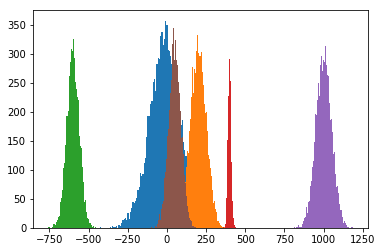

In [270]:
plt.hist(a,bins=100)
plt.hist(b,bins=100)
plt.hist(c,bins=100)
plt.hist(d,bins=100)
plt.hist(e,bins=100)
plt.hist(f,bins=100)

In [271]:
def calc_squrt(a,b):
    return (a**2+b**2+c**2+d**2+e**2+f**2)**(0.5)

In [272]:
r = calc_squrt(a,b)

In [273]:
r.shape

(10000,)

In [274]:
r

array([1219.27007203, 1271.65548187, 1259.44841124, ..., 1302.41135373,
       1249.78332785, 1188.09119514])

In [275]:
df = pd.DataFrame({
    "a": a,
    "b": b,
    "c": c,
    "d": d,
    "e": e,
    "f": f,
    "r":r
})

In [276]:
df.head()

,a,b,c,d,e,f,r
0,45.962223,180.058856,-588.023819,419.542032,964.498852,-6.342517,1219.270072
1,-48.938196,239.714128,-566.524546,391.012365,1039.167709,59.494508,1271.655482
2,-76.074448,202.193711,-622.248358,399.052164,995.466179,46.390945,1259.448411
3,-33.475973,295.349655,-545.578156,401.724637,1027.962472,36.469681,1267.054517
4,-82.437309,78.125408,-563.422909,396.476839,1027.317482,27.129631,1242.439525


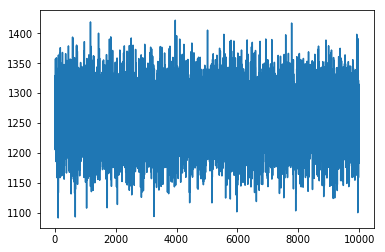

In [277]:
x = np.arange(len(df["r"]))
plt.plot(x,df["r"])

In [298]:
t1= np.where(df["r"] >= 1300,0,1)
t2= np.where(df["r"] >= 1300,1,0)

In [299]:
df["off"] = t1
df["on"] = t2

In [300]:
df.head()

,a,b,c,d,e,f,r,off,on
0,45.962223,180.058856,-588.023819,419.542032,964.498852,-6.342517,1219.270072,1,0
1,-48.938196,239.714128,-566.524546,391.012365,1039.167709,59.494508,1271.655482,1,0
2,-76.074448,202.193711,-622.248358,399.052164,995.466179,46.390945,1259.448411,1,0
3,-33.475973,295.349655,-545.578156,401.724637,1027.962472,36.469681,1267.054517,1,0
4,-82.437309,78.125408,-563.422909,396.476839,1027.317482,27.129631,1242.439525,1,0


In [301]:
df1 = df[df.on==1]

df2 = df[df.on==0]

In [302]:
df1.shape,df2.shape

((1728, 9), (8272, 9))

In [303]:
t = np.array([t1,t2])

In [304]:
t.T

array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [0, 1],
       [1, 0],
       [1, 0]])

In [305]:
df.shape

(10000, 9)

In [306]:
t.T[:7000].shape

(7000, 2)

In [307]:
t_train = t.T[:7000]

In [308]:
t_train

array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]])

In [309]:
t_test = t.T[7001:,:]
print(t_test)

[[0 1]
 [1 0]
 [1 0]
 ...
 [0 1]
 [1 0]
 [1 0]]


In [310]:
t_train.shape,t_test.shape

((7000, 2), (2999, 2))

In [311]:
x = np.array([df["a"],df["b"],df["c"],df["d"],df["e"],df["f"]]).T

In [312]:
x.shape

(10000, 6)

In [313]:
(x_train, x_test) = (x[:7000],x[7001:])

In [314]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.optimizer import SGD, Adam

max_epochs = 10
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1
iter_nums = 30000

def __train(weight_init_std):
    bn_network = MultiLayerNetExtend(input_size=6, hidden_size_list=[100, 100, 100], output_size=2,
                                     weight_init_std=weight_init_std, use_batchnorm=True)
    network = MultiLayerNetExtend(input_size=6, hidden_size_list=[100, 100, 100], output_size=2,
                                weight_init_std=weight_init_std)
    optimizer = SGD(lr=learning_rate)
    
    train_acc_list = []
    bn_train_acc_list = []
    bn_test_acc_list =[]
    
    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0
    
    for i in range(iter_nums):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]
    
        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)
    
        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            bn_test_acc = bn_network.accuracy(x_test, t_test)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)
            bn_test_acc_list.append(bn_test_acc)
    
            print("epoch:" + str(epoch_cnt) + " | " + str(bn_train_acc) + " - " + str(bn_test_acc))
    
            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break
                
    return bn_train_acc_list, bn_test_acc_list

In [315]:
train_acc_list61, bn_train_acc_list61 = __train('He')

epoch:0 | 0.17914285714285713 - 0.17005668556185394
epoch:1 | 0.9755714285714285 - 0.9706568856285428
epoch:2 | 0.9721428571428572 - 0.9693231077025676
epoch:3 | 0.9751428571428571 - 0.9699899966655552
epoch:4 | 0.9828571428571429 - 0.9736578859619873
epoch:5 | 0.9832857142857143 - 0.9739913304434812
epoch:6 | 0.9891428571428571 - 0.9859953317772591
epoch:7 | 0.9927142857142857 - 0.9836612204068023
epoch:8 | 0.9904285714285714 - 0.9813271090363455
epoch:9 | 0.989 - 0.9816605535178393


In [316]:
t.T[:700].shape

(700, 2)

In [317]:
t_train = t.T[:700]

In [318]:
t_train

array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]])

In [319]:
t_test = t.T[701:1000,:]
print(t_test)

[[0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]

In [320]:
t_train.shape,t_test.shape

((700, 2), (299, 2))

In [321]:
x = np.array([df["a"],df["b"],df["c"],df["d"],df["e"],df["f"]]).T

In [322]:
x.shape

(10000, 6)

In [323]:
(x_train, x_test) = (x[:700],x[701:1000])

In [324]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.optimizer import SGD, Adam

max_epochs = 10
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1
iter_nums = 30000

def __train(weight_init_std):
    bn_network = MultiLayerNetExtend(input_size=6, hidden_size_list=[100, 100, 100], output_size=2,
                                     weight_init_std=weight_init_std, use_batchnorm=True)
    network = MultiLayerNetExtend(input_size=6, hidden_size_list=[100, 100, 100], output_size=2,
                                weight_init_std=weight_init_std)
    optimizer = SGD(lr=learning_rate)
    
    train_acc_list = []
    bn_train_acc_list = []
    bn_test_acc_list =[]
    
    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0
    
    for i in range(iter_nums):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]
    
        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)
    
        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            bn_test_acc = bn_network.accuracy(x_test, t_test)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)
            bn_test_acc_list.append(bn_test_acc)
    
            print("epoch:" + str(epoch_cnt) + " | " + str(bn_train_acc) + " - " + str(bn_test_acc))
    
            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break
                
    return bn_train_acc_list, bn_test_acc_list

In [325]:
train_acc_list62, bn_train_acc_list62 = __train('He')

epoch:0 | 0.8014285714285714 - 0.7959866220735786
epoch:1 | 0.1957142857142857 - 0.15384615384615385
epoch:2 | 0.1957142857142857 - 0.15384615384615385
epoch:3 | 0.2342857142857143 - 0.1939799331103679
epoch:4 | 0.48857142857142855 - 0.4280936454849498
epoch:5 | 0.77 - 0.7491638795986622
epoch:6 | 0.8628571428571429 - 0.842809364548495
epoch:7 | 0.9228571428571428 - 0.903010033444816
epoch:8 | 0.9671428571428572 - 0.9331103678929766
epoch:9 | 0.9742857142857143 - 0.959866220735786


Text(0.5,1,'Data Num')

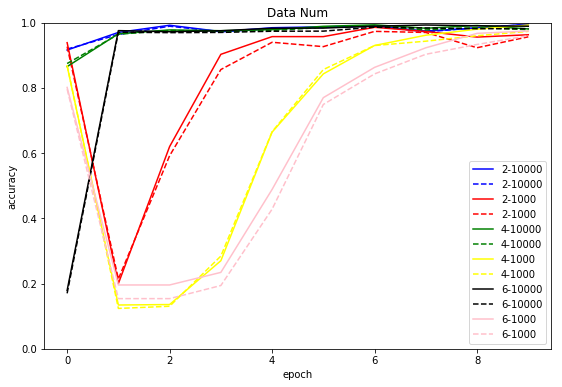

In [326]:
# グラフの描画
plt.figure(figsize=(20,6)) # figureの縦横の大きさ
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(bn_train_acc_list3))
plt.subplot(1,2,1)
plt.plot(x, train_acc_list3, label='2-10000', markevery=2, color = "blue")
plt.plot(x, bn_train_acc_list3, label='2-10000', markevery=2, color = "blue",linestyle = "dashed")
plt.plot(x, train_acc_list4, label='2-1000', markevery=2, color = "red")
plt.plot(x, bn_train_acc_list4, label='2-1000', markevery=2, color = "red",linestyle = "dashed")
plt.plot(x, train_acc_list41, label='4-10000', markevery=2, color = "green")
plt.plot(x, bn_train_acc_list41, label='4-10000', markevery=2, color = "green",linestyle = "dashed")
plt.plot(x, train_acc_list42, label='4-1000', markevery=2, color = "yellow")
plt.plot(x, bn_train_acc_list42, label='4-1000', markevery=2, color = "yellow",linestyle = "dashed")
plt.plot(x, train_acc_list61, label='6-10000', markevery=2, color = "black")
plt.plot(x, bn_train_acc_list61, label='6-10000', markevery=2, color = "black",linestyle = "dashed")
plt.plot(x, train_acc_list62, label='6-1000', markevery=2, color = "pink")
plt.plot(x, bn_train_acc_list62, label='6-1000', markevery=2, color = "pink",linestyle = "dashed")

plt.xlabel('epoch')
plt.xlabel('epoch')
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.title('Data Num')

### 考察
* データ数が多いと次元数を増やしても精度に影響しない
* データ数が少ないと次元を大きくするほうが精度が落ちている